In [69]:
import keras
from keras import layers
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras import regularizers

In [56]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [57]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Try the simplest possible autoencoder

Epoch 1/100
235/235 [==============================] - 1s 3ms/step - loss: 0.2284 - val_loss: 0.1327
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1286 - val_loss: 0.1273
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1259 - val_loss: 0.1260
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1249 - val_loss: 0.1251
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1238 - val_loss: 0.1236
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1218 - val_loss: 0.1213
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1199 - val_loss: 0.1198
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1188 - val_loss: 0.1190
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1182 - val_loss: 0.1184
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1177 - val_lo

235/235 [==============================] - 1s 3ms/step - loss: 0.1074 - val_loss: 0.1079
Epoch 82/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1074 - val_loss: 0.1079
Epoch 83/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1074 - val_loss: 0.1079
Epoch 84/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1074 - val_loss: 0.1079
Epoch 85/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1079
Epoch 86/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1080
Epoch 87/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1079
Epoch 88/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1079
Epoch 89/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 0.1079
Epoch 90/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1073 - val_loss: 

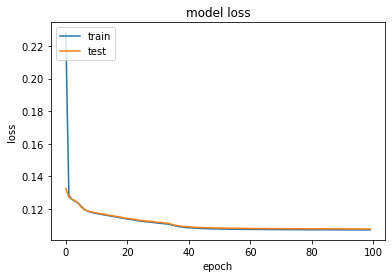

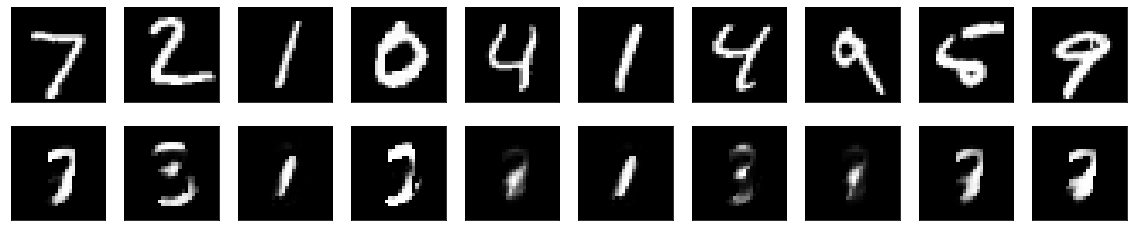

In [65]:
# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
#plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
#plot_model(decoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

history = autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Try with a few hidden layer with regulizer to avoid overfitting 

In [72]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [73]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

history =autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1501 - val_loss: 0.1263
Epoch 2/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1248 - val_loss: 0.1251
Epoch 3/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1230 - val_loss: 0.1232
Epoch 4/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1193 - val_loss: 0.1162
Epoch 5/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1133 - val_loss: 0.1118
Epoch 6/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1096 - val_loss: 0.1092
Epoch 7/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1082 - val_loss: 0.1086
Epoch 8/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1075 - val_loss: 0.1078
Epoch 9/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1069 - val_loss: 0.1072
Epoch 10/500
235/235 [==============================] - 1s 5ms/step - loss: 0.1064 - val_lo

Epoch 81/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0892 - val_loss: 0.0905
Epoch 82/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0892 - val_loss: 0.0906
Epoch 83/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0891 - val_loss: 0.0905
Epoch 84/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0890 - val_loss: 0.0905
Epoch 85/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0889 - val_loss: 0.0903
Epoch 86/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0889 - val_loss: 0.0902
Epoch 87/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0888 - val_loss: 0.0903
Epoch 88/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0888 - val_loss: 0.0902
Epoch 89/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0887 - val_loss: 0.0902
Epoch 90/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0887

235/235 [==============================] - 1s 5ms/step - loss: 0.0867 - val_loss: 0.0891
Epoch 161/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0867 - val_loss: 0.0888
Epoch 162/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0866 - val_loss: 0.0889
Epoch 163/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0866 - val_loss: 0.0890
Epoch 164/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0866 - val_loss: 0.0889
Epoch 165/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0866 - val_loss: 0.0889
Epoch 166/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0864 - val_loss: 0.0889
Epoch 167/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0865 - val_loss: 0.0890
Epoch 168/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0866 - val_loss: 0.0891
Epoch 169/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0865 - v

235/235 [==============================] - 1s 5ms/step - loss: 0.0853 - val_loss: 0.0881
Epoch 240/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0853 - val_loss: 0.0881
Epoch 241/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0854 - val_loss: 0.0880
Epoch 242/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0853 - val_loss: 0.0882
Epoch 243/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0852 - val_loss: 0.0881
Epoch 244/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0852 - val_loss: 0.0880
Epoch 245/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0852 - val_loss: 0.0880
Epoch 246/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0852 - val_loss: 0.0879
Epoch 247/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0852 - val_loss: 0.0879
Epoch 248/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0851 - v

235/235 [==============================] - 1s 5ms/step - loss: 0.0843 - val_loss: 0.0873
Epoch 319/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0843 - val_loss: 0.0873
Epoch 320/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0843 - val_loss: 0.0873
Epoch 321/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0842 - val_loss: 0.0874
Epoch 322/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0843 - val_loss: 0.0876
Epoch 323/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0843 - val_loss: 0.0877
Epoch 324/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0842 - val_loss: 0.0873
Epoch 325/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0842 - val_loss: 0.0875
Epoch 326/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0843 - val_loss: 0.0876
Epoch 327/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0842 - v

235/235 [==============================] - 1s 5ms/step - loss: 0.0834 - val_loss: 0.0867
Epoch 398/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0834 - val_loss: 0.0870
Epoch 399/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0833 - val_loss: 0.0867
Epoch 400/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0833 - val_loss: 0.0866
Epoch 401/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0833 - val_loss: 0.0867
Epoch 402/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0832 - val_loss: 0.0868
Epoch 403/500
235/235 [==============================] - 1s 6ms/step - loss: 0.0833 - val_loss: 0.0868
Epoch 404/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0832 - val_loss: 0.0867
Epoch 405/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0832 - val_loss: 0.0867
Epoch 406/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0833 - v

235/235 [==============================] - 1s 5ms/step - loss: 0.0827 - val_loss: 0.0864
Epoch 477/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0828 - val_loss: 0.0867
Epoch 478/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0828 - val_loss: 0.0865
Epoch 479/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0827 - val_loss: 0.0864
Epoch 480/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0826 - val_loss: 0.0865
Epoch 481/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0827 - val_loss: 0.0866
Epoch 482/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0827 - val_loss: 0.0866
Epoch 483/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0827 - val_loss: 0.0863
Epoch 484/500
235/235 [==============================] - 1s 4ms/step - loss: 0.0826 - val_loss: 0.0863
Epoch 485/500
235/235 [==============================] - 1s 5ms/step - loss: 0.0826 - v

dict_keys(['loss', 'val_loss'])


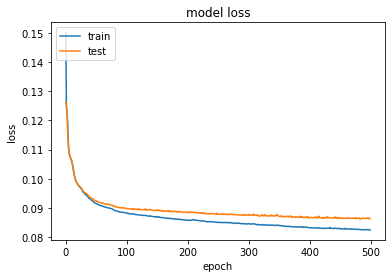

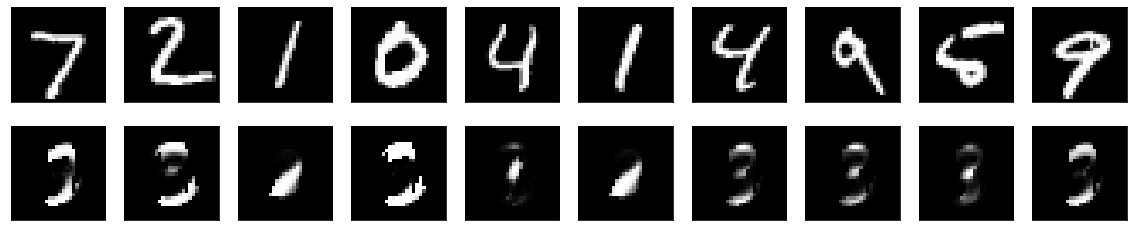

In [74]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


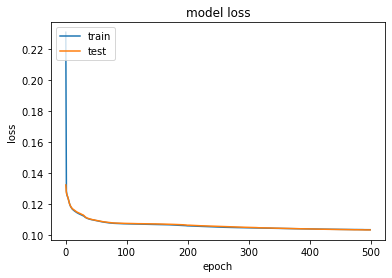

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
history.history['loss']

[0.2307824343442917,
 0.1284419298171997,
 0.1258244514465332,
 0.12476442754268646,
 0.12361516803503036,
 0.12201723456382751,
 0.12052875757217407,
 0.11937198787927628,
 0.11846711486577988,
 0.11779264360666275,
 0.11719764024019241,
 0.11672062426805496,
 0.11635790765285492,
 0.11603439599275589,
 0.11572656780481339,
 0.11543141305446625,
 0.11515028774738312,
 0.1148911714553833,
 0.11463337391614914,
 0.1143917664885521,
 0.11418363451957703,
 0.11396683752536774,
 0.11377471685409546,
 0.11360418051481247,
 0.11344514042139053,
 0.11327461153268814,
 0.11304393410682678,
 0.11283665895462036,
 0.11269723623991013,
 0.1125069335103035,
 0.11228683590888977,
 0.11186598241329193,
 0.11158350110054016,
 0.11130957305431366,
 0.11112450808286667,
 0.11092346161603928,
 0.11075221002101898,
 0.11063159257173538,
 0.11050741374492645,
 0.11039172112941742,
 0.11028904467821121,
 0.1102033257484436,
 0.11012571305036545,
 0.11005203425884247,
 0.10998711735010147,
 0.10992557555437

In [47]:
# This is the size of our encoded representations
encoding_dim = 2  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image


input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
#autoencoder = keras.Model(input_img, decoded)

In [48]:
# This model maps an input to its encoded representation
#encoder = keras.Model(input_img, encoded)
#print(encoder.summary())
#plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [49]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1398 - val_loss: 0.1133
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1055 - val_loss: 0.1023
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0993 - val_loss: 0.0974
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0948 - val_loss: 0.0926
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0901 - val_loss: 0.0884
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0859 - val_loss: 0.0840
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0826 - val_loss: 0.0809
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0801 - val_loss: 0.0787
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0779 - val_loss: 0.0769
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0763 - val_lo

235/235 [==============================] - 1s 5ms/step - loss: 0.0537 - val_loss: 0.0532
Epoch 81/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0536 - val_loss: 0.0532
Epoch 82/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0535 - val_loss: 0.0531
Epoch 83/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0533 - val_loss: 0.0529
Epoch 84/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0532 - val_loss: 0.0528
Epoch 85/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0531 - val_loss: 0.0528
Epoch 86/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0531 - val_loss: 0.0528
Epoch 87/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0531 - val_loss: 0.0527
Epoch 88/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0530 - val_loss: 0.0528
Epoch 89/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0530 - val_loss: 

In [50]:
autoencoder.compile(optimizer='adam', loss='mean_absolute_error')

(60000, 784)
(10000, 784)


In [18]:
history = autoencoder.fit(x_train, x_train,
                epochs=500,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 2/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 3/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 4/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 5/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 6/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 7/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 8/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 9/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 10/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_lo

235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 82/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 83/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 84/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 85/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 86/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 87/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 88/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 89/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 90/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1068 - val_loss: 

Epoch 161/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 162/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 163/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 164/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 165/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 166/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 167/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 168/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 169/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1071
Epoch 170/500
235/235 [==============================] - 1s 3ms/step - lo

235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1071
Epoch 241/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1068 - val_loss: 0.1070
Epoch 242/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 243/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 244/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 245/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 246/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 247/500
235/235 [==============================] - ETA: 0s - loss: 0.106 - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 248/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1071
Epoch 249/500
235/235 [==============================] - 1s 3ms

235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 320/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 321/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 322/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 323/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 324/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 325/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 326/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 327/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 328/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - v

235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 399/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 400/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 401/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 402/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 403/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 404/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 405/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 406/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 407/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - v

235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 478/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 479/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 480/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 481/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 482/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 483/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 484/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 485/500
235/235 [==============================] - 1s 4ms/step - loss: 0.1067 - val_loss: 0.1070
Epoch 486/500
235/235 [==============================] - 1s 3ms/step - loss: 0.1067 - v

dict_keys(['loss', 'val_loss'])


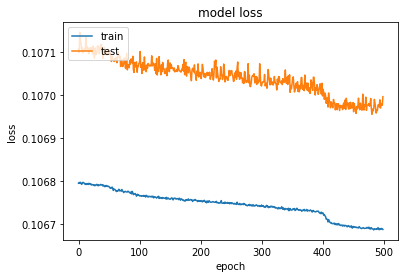

In [19]:
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

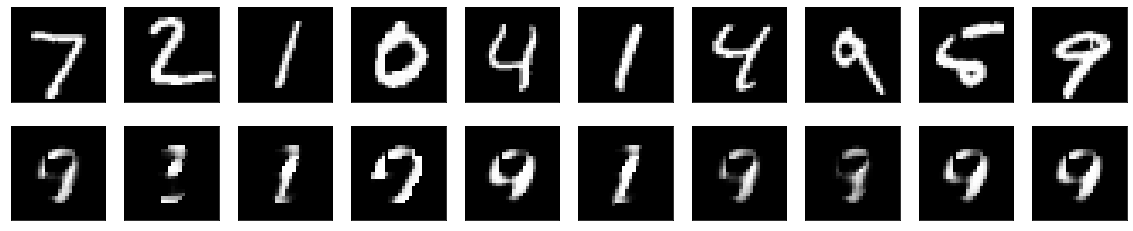

In [21]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
pip install pydot

In [ ]:
!pip install graphviz 